In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# MILESTONE-2 Visual Exploration and Delay Trends

In [5]:
df_main = pd.read_csv("cleaned_flight_data.csv")

In [25]:
df_main.isna().sum()

Date                 0
DayName              0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
DelayReason          0
DelayTime            0
Route                0
Month                0
dtype: int64

In [6]:
# Reduce the size of int64, float64 and object into int32, float32 for better optimization
def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type == "int64":
            df[col] = pd.to_numeric(df[col], downcast="integer")
        elif col_type == "float64":
            df[col] = pd.to_numeric(df[col], downcast="float")
    return df
df = optimize_dataframe(df_main)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936751 entries, 0 to 1936750
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   DayName            object 
 2   DepTime            object 
 3   CRSDepTime         object 
 4   ArrTime            object 
 5   CRSArrTime         object 
 6   UniqueCarrier      object 
 7   FlightNum          int16  
 8   TailNum            object 
 9   ActualElapsedTime  object 
 10  CRSElapsedTime     object 
 11  AirTime            object 
 12  ArrDelay           object 
 13  DepDelay           float32
 14  Origin             object 
 15  Dest               object 
 16  Distance           int16  
 17  TaxiIn             float32
 18  TaxiOut            float32
 19  Cancelled          int8   
 20  CancellationCode   object 
 21  Diverted           int8   
 22  DelayReason        object 
 23  DelayTime          float32
dtypes: float32(4), int16(2), int8(2), object(16)
memor

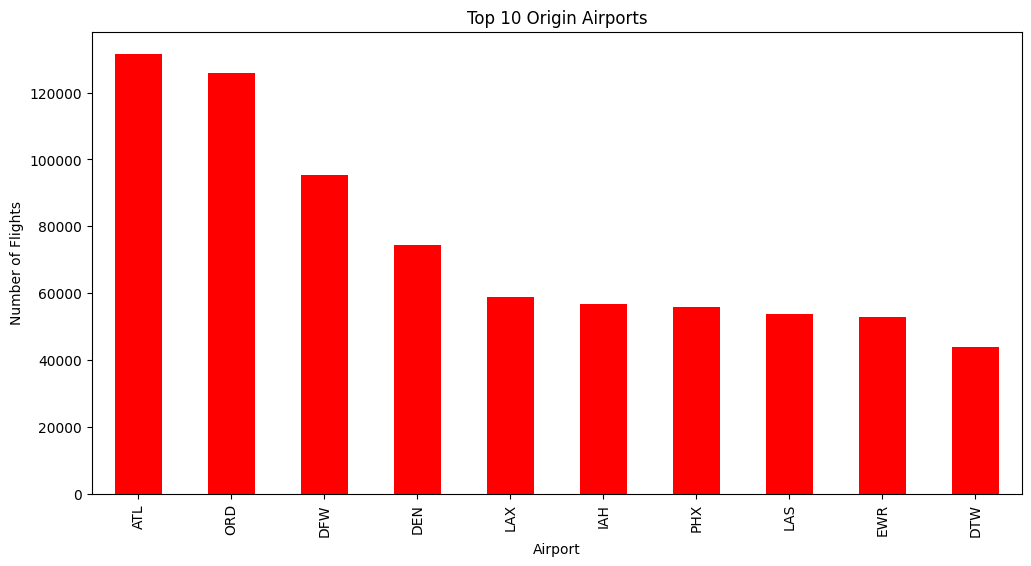

In [11]:
# Top 10 Origin Airports having higher number of flights
top_airports = df['Origin'].value_counts().head(10)

colors = sns.color_palette("Set2")
plt.figure(figsize=(12,6))
top_airports.plot(kind='bar',color="red")
plt.title("Top 10 Origin Airports")
plt.xlabel("Airport")
plt.ylabel("Number of Flights")

plt.show()

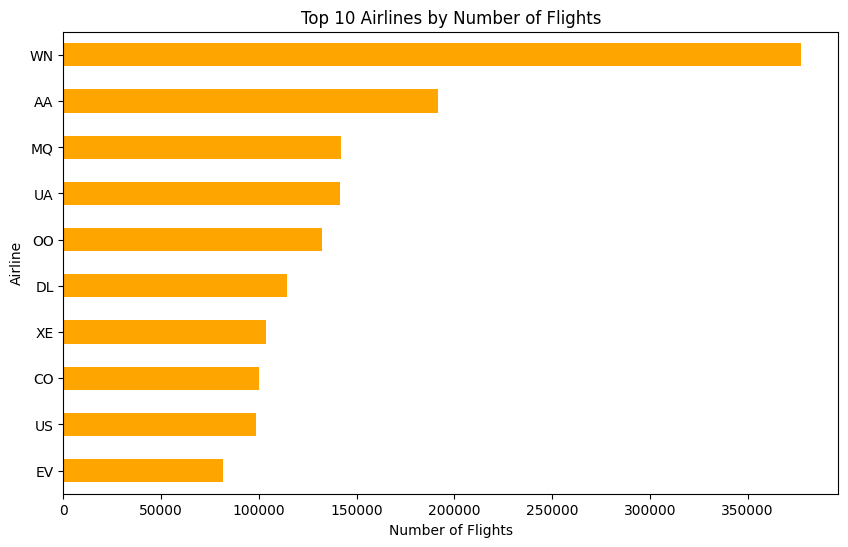

In [12]:
# count of 10 Airlines by Number of flights
airlines = df['UniqueCarrier'].value_counts().head(10)
# colors = sns.color_palette("husl", len(airlines))
plt.figure(figsize=(10,6))
airlines.plot(kind='barh', color = "orange")
plt.title("Top 10 Airlines by Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.gca().invert_yaxis()
plt.show()

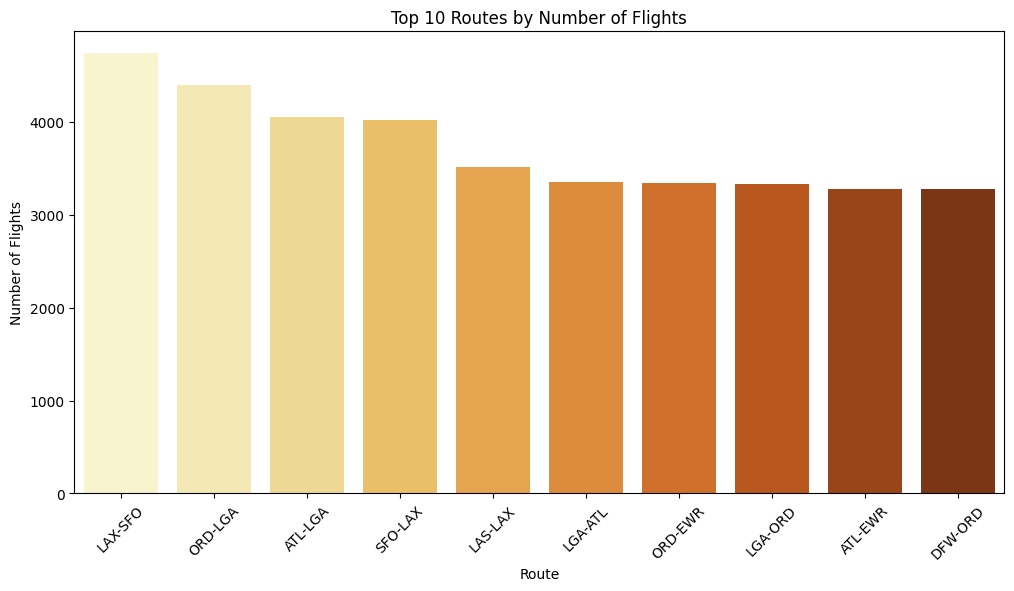

In [14]:
# Top 10 Routes by number of flights
df['Route'] = df['Origin'].astype(str) + "-" + df['Dest'].astype(str)

# Convert value_counts to DataFrame
top_routes = df['Route'].value_counts().head(10).reset_index()
top_routes.columns = ["Route", "Flights"]

plt.figure(figsize=(12,6))
sns.barplot(data=top_routes, x="Route", y="Flights", hue= "Route", palette="YlOrBr", legend = False)
plt.title("Top 10 Routes by Number of Flights")
plt.xlabel("Route")
plt.xticks(rotation=45)
plt.ylabel("Number of Flights")
plt.show()

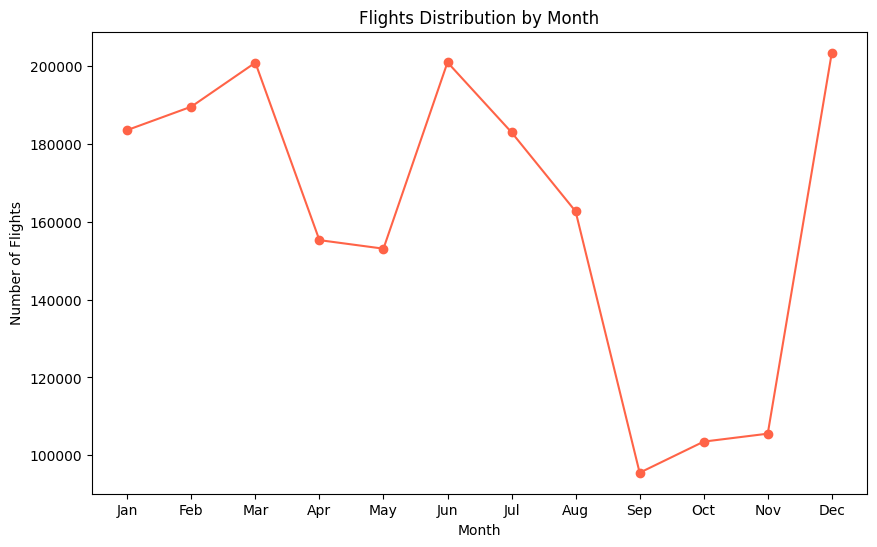

In [31]:
import calendar
#  Distribution of Flights by Months
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_flights = df['Month'].value_counts().sort_index()

# Map month numbers to 3-letter names
month_names = [calendar.month_abbr[m] for m in monthly_flights.index]

plt.figure(figsize=(10,6))
plt.plot(month_names, monthly_flights.values, marker='o',color = "tomato")
plt.title("Flights Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.show()

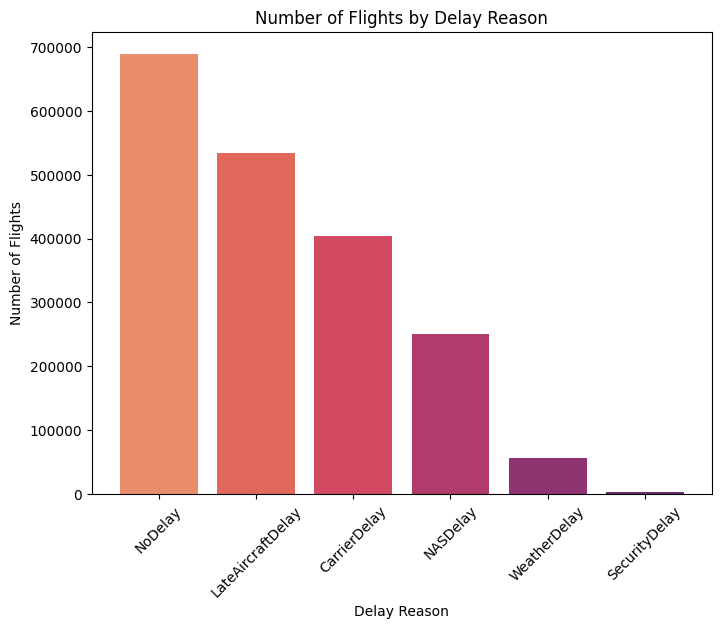

In [30]:
# Created a histogram on the basis of Delay Reasons 

delay_counts = df["DelayReason"].value_counts()
c = sns.color_palette("flare")
plt.figure(figsize=(8,6))
plt.bar(delay_counts.index, delay_counts.values, color= c)
plt.title("Number of Flights by Delay Reason")
plt.xlabel("Delay Reason")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

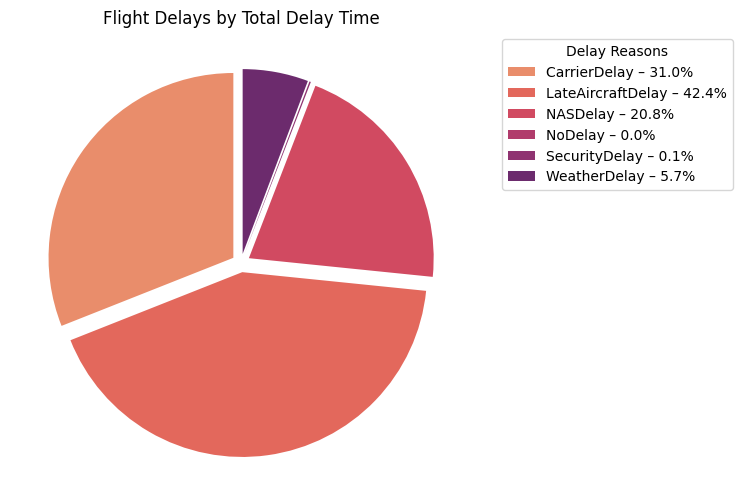

In [26]:
# Flights DelayReasons by DelayTime
delay_sum = df.groupby("DelayReason")["DelayTime"].sum()

plt.figure(figsize=(6,6))

# Create explode list
explode = [0.05] * len(delay_sum)   # 0.05 = small gap
colors = sns.color_palette("flare", len(delay_sum))
wedges, texts = plt.pie(
    delay_sum.values,
    startangle=90,
    explode=explode,
    colors=colors
)

# Legend 
plt.legend(
    [f"{reason} – {percent:.1f}%" 
     for reason, percent in zip(delay_sum.index, delay_sum.values / delay_sum.sum() * 100)],
    title="Delay Reasons",
    bbox_to_anchor=(1.05, 1), loc='upper left'
)

plt.title("Flight Delays by Total Delay Time")
plt.show()


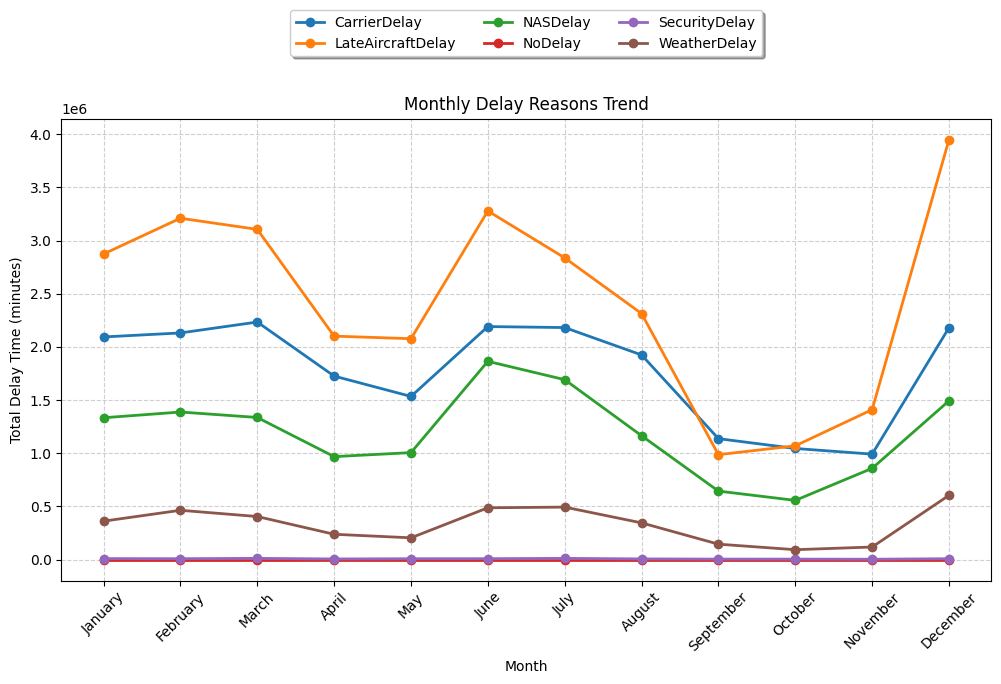

In [35]:
# Convert Date to datetime and extract month
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Month"] = df["Date"].dt.month_name()

# Group by Month & DelayReason
df2 = df.groupby(["Month", "DelayReason"])["DelayTime"].sum().unstack(fill_value=0)

# Months
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
df2 = df2.reindex(month_order)

# Multi-line plot
plt.figure(figsize=(12,6))
for col in df2.columns:
    plt.plot(df2.index, df2[col], marker="o", linewidth=2, label=col)

# Formatting 
plt.title("Monthly Delay Reasons Trend")
plt.xlabel("Month")
plt.ylabel("Total Delay Time (minutes)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25),
           ncol=3, fancybox=True, shadow=True)
plt.show()


In [36]:
# Select only cancelled flights
cancelled_flights = df[df['Cancelled'] == 1]

# Count cancellations
code_counts = cancelled_flights['CancellationCode'].value_counts()

# Calculate percentage
code_percentage = (code_counts / code_counts.sum()) * 100

# Display the percentages
print("Percentage of Cancellations by Code:")
print(code_percentage)

Percentage of Cancellations by Code:
CancellationCode
B    48.499210
A    38.862559
C    12.638231
Name: count, dtype: float64


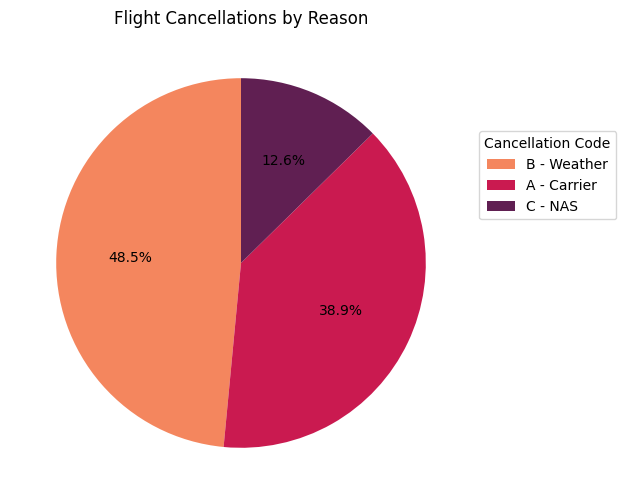

In [24]:
# Select only cancelled flights
cancelled_flights = df[df['Cancelled'] == 1]

# Map codes to descriptive names
code_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
}

# Count cancellations
code_counts = cancelled_flights['CancellationCode'].value_counts()

colors = sns.color_palette("rocket_r", len(code_counts)) 

# Pie chart
plt.figure(figsize=(6,6))
patches, texts, autotexts = plt.pie(
    code_counts, 
    labels=None,            
    autopct='%1.1f%%',       
    startangle=90,
    colors=colors            
)

# Create legend with code + name
legend_labels = [f"{code} - {name}" for code, name in zip(code_counts.index, 
                                                           [code_mapping[c] for c in code_counts.index])]
plt.legend(patches, legend_labels, title="Cancellation Code", bbox_to_anchor=(1, 0.8))

plt.title("Flight Cancellations by Reason")
plt.show()


# Milestone-3 = Route, Cancellation, and Seasonal Insights

               TotalFlights  Cancelled  Diverted  CancelRate_%  DivertRate_%
UniqueCarrier                                                               
MQ                   141920        104       593      0.073281      0.417841
OO                   132433         89       564      0.067204      0.425876
9E                    51884         58       258      0.111788      0.497263
YV                    67063         53       241      0.079030      0.359364
UA                   141426         47       475      0.033233      0.335865
AA                   191865         46       909      0.023975      0.473771
XE                   103663         46       470      0.044375      0.453392
CO                   100195         38       426      0.037926      0.425171
EV                    81877         29        86      0.035419      0.105036
US                    98425         26       392      0.026416      0.398273
DL                   114238         21       489      0.018383      0.428054

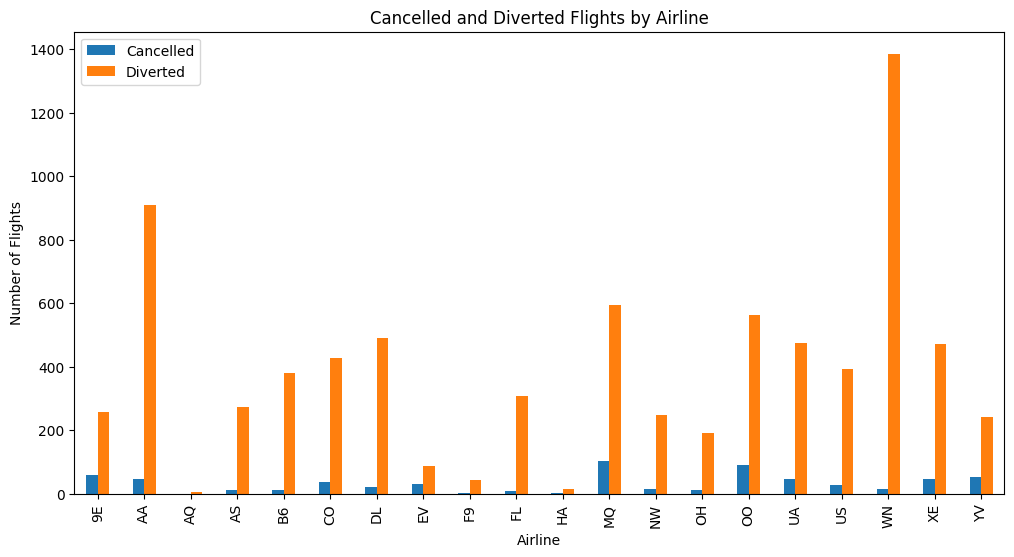

In [35]:
# Comapring number of flight Cancelled and Diverted on the basis of flights 
airline = df.groupby("UniqueCarrier",observed =False).agg(
    TotalFlights = ("Cancelled", "count"),
    Cancelled = ("Cancelled", "sum"),
    Diverted = ("Diverted", "sum")
)
# convert it into percentage  
airline["CancelRate_%"] = (airline["Cancelled"] / airline["TotalFlights"]) * 100
airline["DivertRate_%"] = (airline["Diverted"] / airline["TotalFlights"]) * 100

print(airline.sort_values("Cancelled", ascending=False))
airline[["Cancelled","Diverted"]].plot(
    kind="bar", figsize=(12,6), stacked=False
)
plt.title("Cancelled and Diverted Flights by Airline")
plt.ylabel("Number of Flights")
plt.xlabel("Airline")
plt.show()

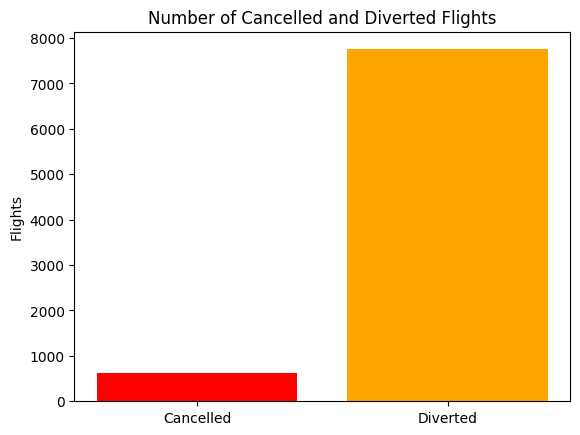

In [11]:
# Comparing number of flight Cancelled and Diverted
counts = {
    "Cancelled": df['Cancelled'].sum(),
    "Diverted": df['Diverted'].sum()
}

plt.bar(counts.keys(), counts.values(), color=['red','orange'])
plt.title("Number of Cancelled and Diverted Flights")
plt.ylabel("Flights")
plt.show()

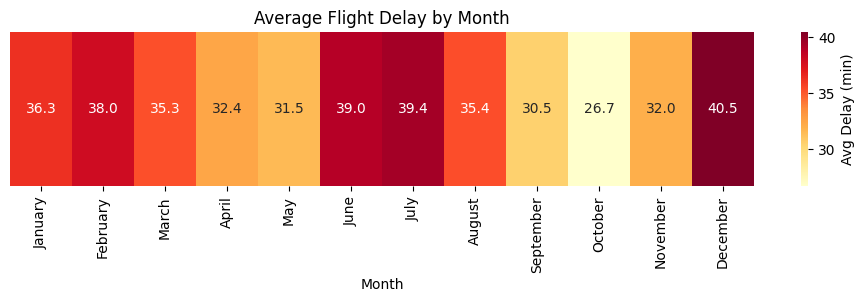

In [24]:
# Average delay per month
monthly_delay = df.groupby("Month")["DelayTime"].mean()

# Arrange months in order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
monthly_delay = monthly_delay.reindex(month_order)

# Convert to DataFrame for heatmap
monthly_delay_df = monthly_delay.to_frame().T   # transpose for heatmap

plt.figure(figsize=(12,2))
sns.heatmap(monthly_delay_df, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Avg Delay (min)'})
plt.title("Average Flight Delay by Month")
plt.yticks([])    
# hide row index
plt.xlabel("Month")
plt.show()


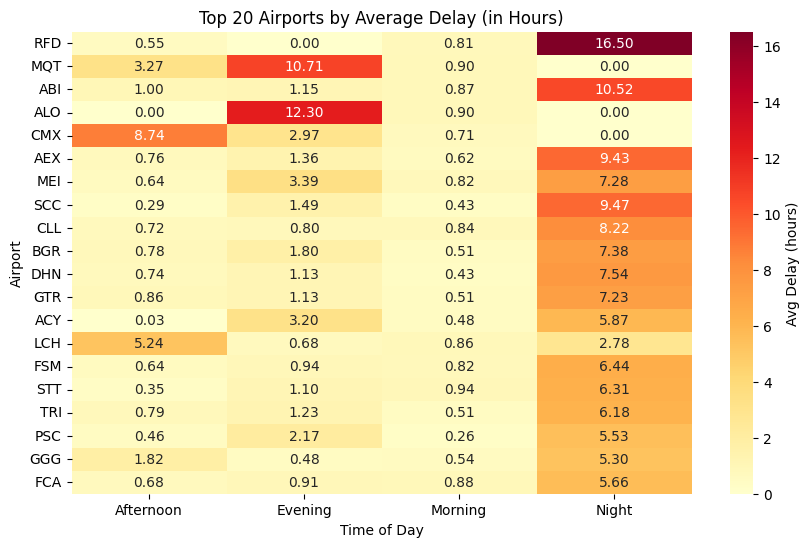

In [28]:
# Average delay (convert into hours) 
delay = df.groupby(["Origin","TimeOfDay"])["DelayTime"].mean().unstack().fillna(0) / 60

# Top 20 airports
top20 = delay.loc[delay.mean(axis=1).sort_values(ascending=False).head(20).index]

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(top20, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Avg Delay (hours)'})
plt.title("Top 20 Airports by Average Delay (in Hours)")
plt.xlabel("Time of Day")
plt.ylabel("Airport")
plt.show()


<bound method Axes.set of <Axes: title={'center': 'Diverted Flights by Month'}, xlabel='Month'>>

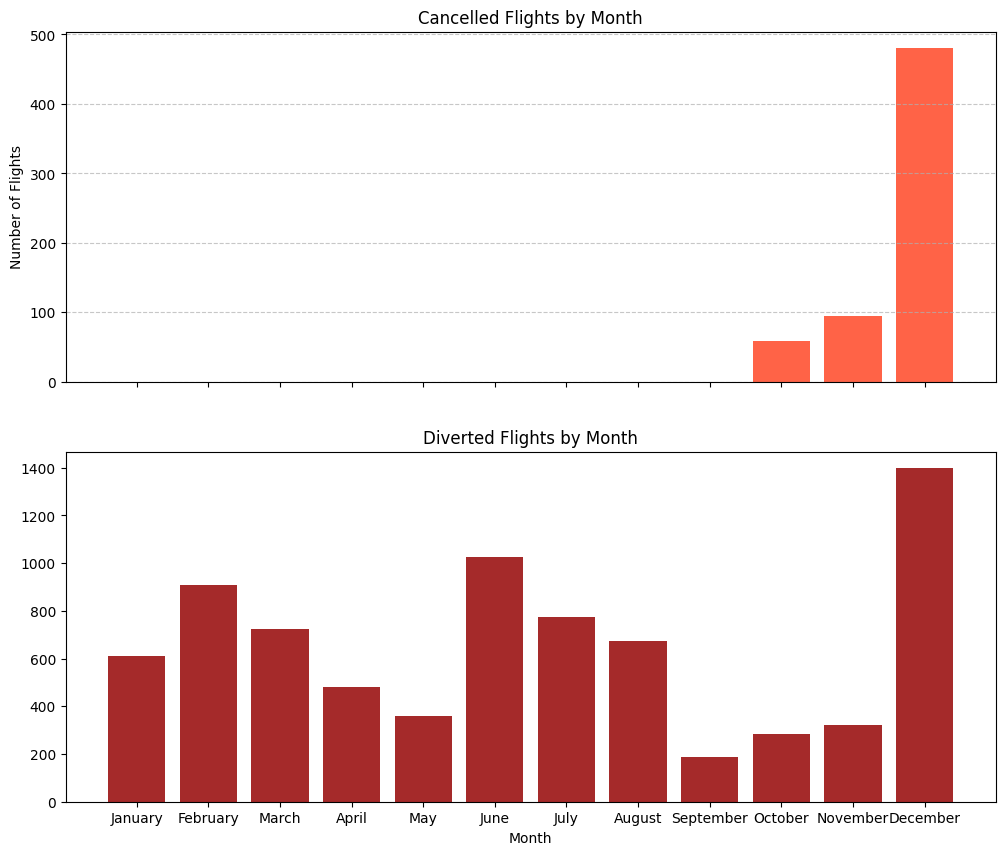

In [21]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Month"] = df["Date"].dt.month_name()

# Count cancellations and diversions per month 
cancel_divert = df.groupby("Month")[["Cancelled", "Diverted"]].sum()

# Months in order 
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
cancel_divert = cancel_divert.reindex(month_order)

# Subplots
fig, axes = plt.subplots(2, 1, figsize=(12,10), sharex=True)

# Cancelled flights
axes[0].bar(cancel_divert.index, cancel_divert["Cancelled"], color="tomato")
axes[0].set_title("Cancelled Flights by Month")
axes[0].set_ylabel("Number of Flights")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Diverted flights
axes[1].bar(cancel_divert.index, cancel_divert["Diverted"], color="brown")
axes[1].set_title("Diverted Flights by Month")
axes[1].set_xlabel("Month")
axes[1].set


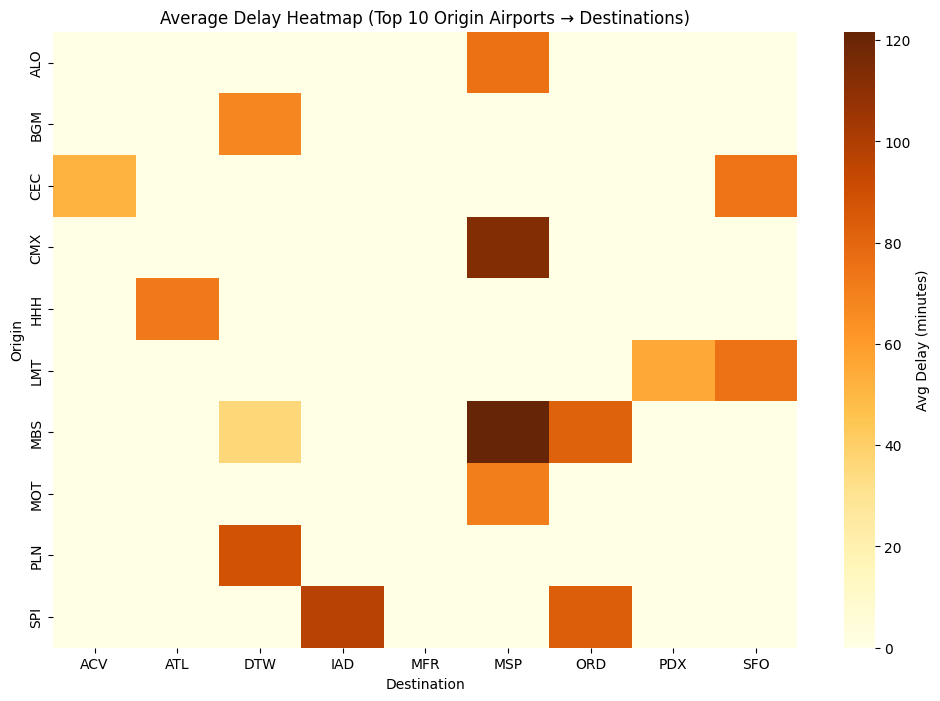

In [23]:
# Average Delay between origin and destination
# Average delay per airport
airport_delay = df.groupby("Origin")["DelayTime"].mean().sort_values(ascending=False)

# Pick top 10 busiest airports by delay
top_airports = airport_delay.head(10).index
heatmap_data = df[df["Origin"].isin(top_airports)].groupby(["Origin", "Dest"])["DelayTime"].mean().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap=sns.color_palette("YlOrBr", as_cmap=True), annot=False, cbar_kws={"label": "Avg Delay (minutes)"})
plt.title("Average Delay Heatmap (Top 10 Origin Airports → Destinations)")
plt.xlabel("Destination")
plt.ylabel("Origin")
plt.show()
